<a href="https://colab.research.google.com/github/RodrigoDSVDF/An-lise-de-Dados/blob/main/MegaSena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import requests
import pandas as pd
from typing import List
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
import numpy as np
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

folder = r'C:\Users\Rodrigo_df\OneDrive\Documentos\Análise Açoes'
for the_file in os.listdir(folder):
    file_path = os.path.join(folder, the_file)
    try:
        if os.path.isfile(file_path):
            os.unlink(file_path)
    except Exception as e:
        print(e)

def get_lottery_results(jogos: List[str]) -> None:
    for jogo in jogos:
        url = f"https://servicebus2.caixa.gov.br/portaldeloterias/api/resultados/download?modalidade={jogo}"
        data = requests.get(url, verify=False)

        output = open(f'{folder}\\{jogo}.xlsx', 'wb')
        output.write(data.content)
        output.close()

jogos = ['MEGA_SENA']

get_lottery_results(jogos)
print('Done')


Done


In [ ]:


# Carregar os dados do arquivo Excel para um DataFrame do pandas
df = pd.read_excel(r"C:\Users\Rodrigo_df\OneDrive\Documentos\Análise Açoes\MEGA_SENA.xlsx")

# Exibir as primeiras linhas do DataFrame para verificar se os dados foram carregados corretamente
print(df.head())





   Concurso Data do Sorteio  Bola1  Bola2  Bola3  Bola4  Bola5  Bola6  \
0         1      11/03/1996      4      5     30     33     41     52   
1         2      18/03/1996      9     37     39     41     43     49   
2         3      25/03/1996     10     11     29     30     36     47   
3         4      01/04/1996      1      5      6     27     42     59   
4         5      08/04/1996      1      2      6     16     19     46   

   Ganhadores 6 acertos Cidade / UF Rateio 6 acertos  Ganhadores 5 acertos  \
0                     0         NaN           R$0,00                    17   
1                     1          PR   R$2.307.162,23                    65   
2                     2      RN; SP     R$391.192,51                    62   
3                     0         NaN           R$0,00                    39   
4                     0         NaN           R$0,00                    98   

  Rateio 5 acertos  Ganhadores 4 acertos Rateio 4 acertos Acumulado 6 acertos  \
0      R$39

In [ ]:
numeros = df[['Bola1', 'Bola2', 'Bola3', 'Bola4', 'Bola5', 'Bola6']]

# Calcular a frequência de cada número
frequencia = numeros.stack().value_counts()

# Exibir os números mais sorteados
print(frequencia.sort_values(ascending=False))

10    311
53    306
5     297
37    289
23    287
34    286
30    285
33    285
41    284
32    284
35    284
4     283
44    282
38    282
42    282
17    280
28    279
27    278
56    278
43    277
54    276
29    276
11    276
16    275
36    275
49    275
13    273
51    273
8     270
46    269
2     268
24    267
6     267
52    266
58    261
50    259
25    259
14    259
59    259
45    258
20    258
18    258
39    257
12    256
1     256
60    255
57    253
47    251
9     251
7     250
19    250
40    249
31    249
3     248
48    246
22    242
15    230
55    226
21    225
26    224
Name: count, dtype: int64


In [ ]:
numeros.head()

,Bola1,Bola2,Bola3,Bola4,Bola5,Bola6
0,4,5,30,33,41,52
1,9,37,39,41,43,49
2,10,11,29,30,36,47
3,1,5,6,27,42,59
4,1,2,6,16,19,46


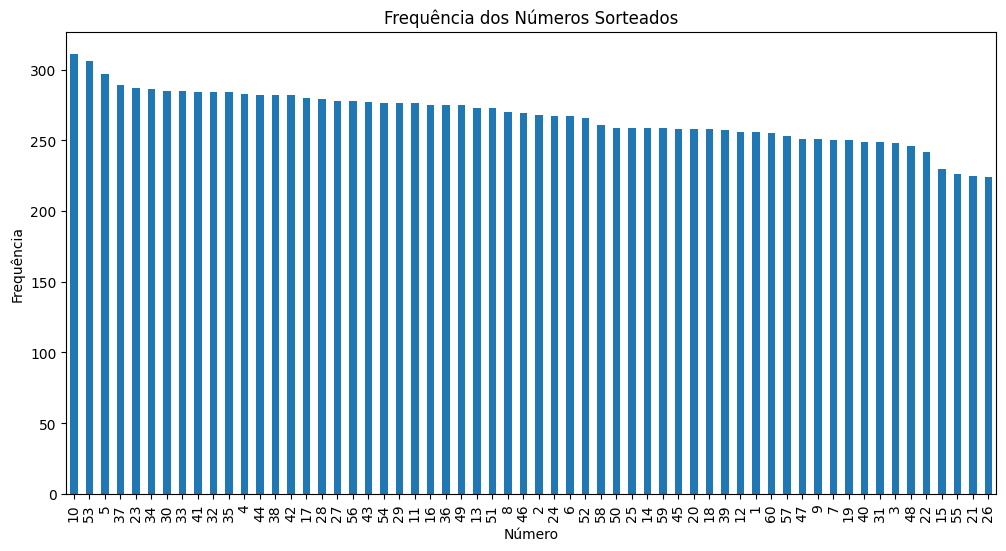

In [ ]:
frequencia_ordenada = frequencia.sort_values(ascending=False)

# Criar um gráfico de barras
plt.figure(figsize=(12, 6))
frequencia_ordenada.plot(kind='bar')
plt.title('Frequência dos Números Sorteados')
plt.xlabel('Número')
plt.ylabel('Frequência')
plt.show()

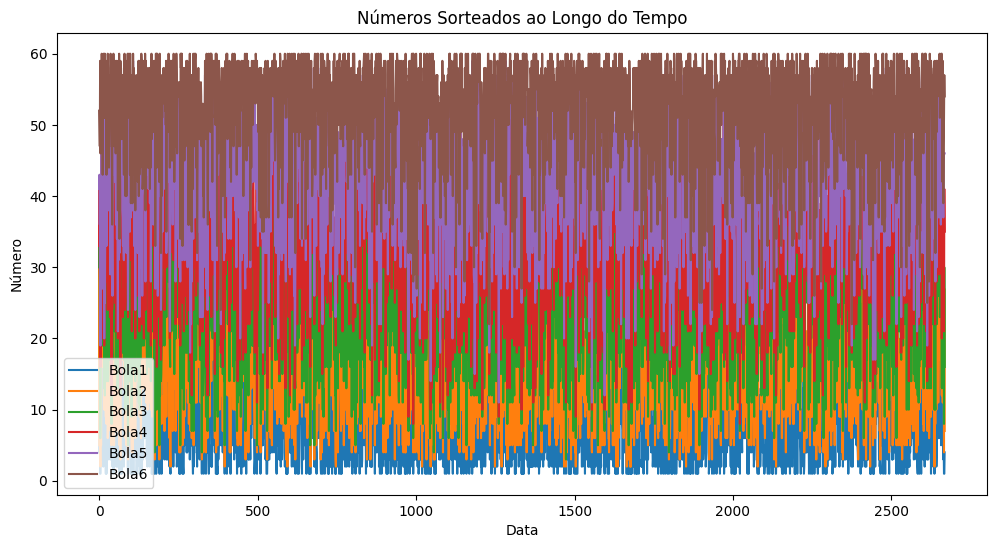

In [ ]:
# Gráfico de linhas para cada número
numeros.plot(figsize=(12, 6))
plt.title('Números Sorteados ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Número')
plt.show()


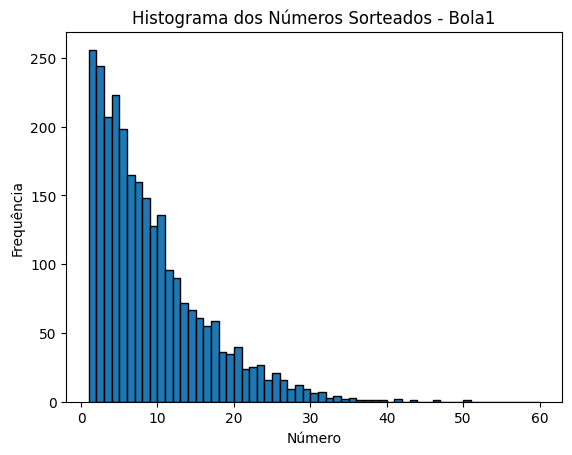

Estatísticas para Bola1:
count    2669.000000
mean        8.611090
std         6.996902
min         1.000000
25%         3.000000
50%         7.000000
75%        12.000000
max        50.000000
Name: Bola1, dtype: float64


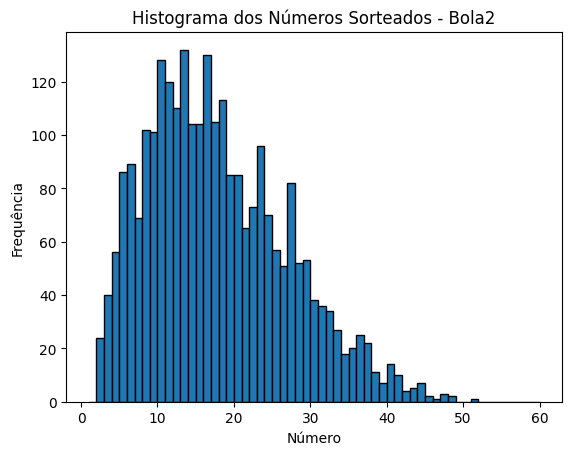

Estatísticas para Bola2:
count    2669.000000
mean       17.341326
std         9.144477
min         2.000000
25%        10.000000
50%        16.000000
75%        23.000000
max        51.000000
Name: Bola2, dtype: float64


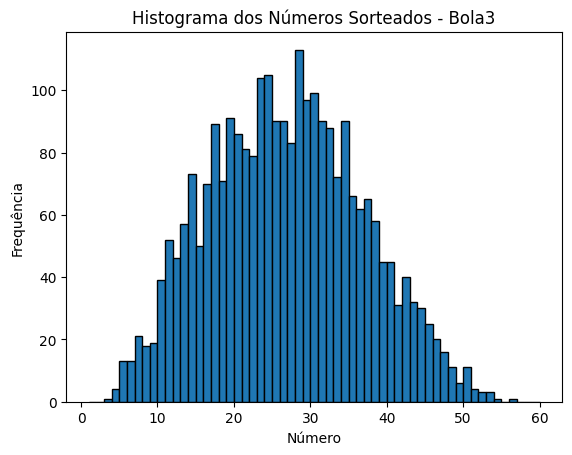

Estatísticas para Bola3:
count    2669.000000
mean       26.351817
std         9.971711
min         3.000000
25%        19.000000
50%        26.000000
75%        33.000000
max        56.000000
Name: Bola3, dtype: float64


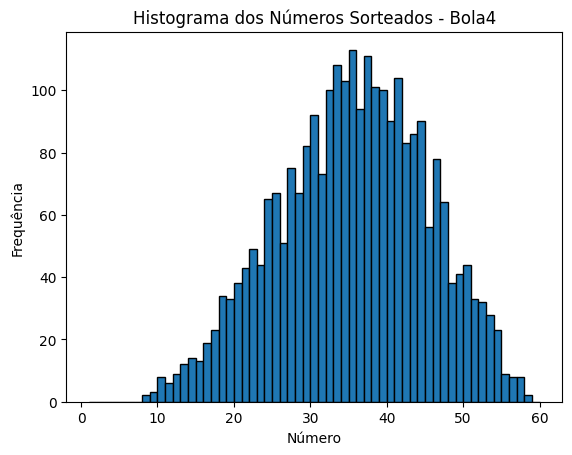

Estatísticas para Bola4:
count    2669.000000
mean       35.065193
std         9.763521
min         8.000000
25%        28.000000
50%        35.000000
75%        42.000000
max        58.000000
Name: Bola4, dtype: float64


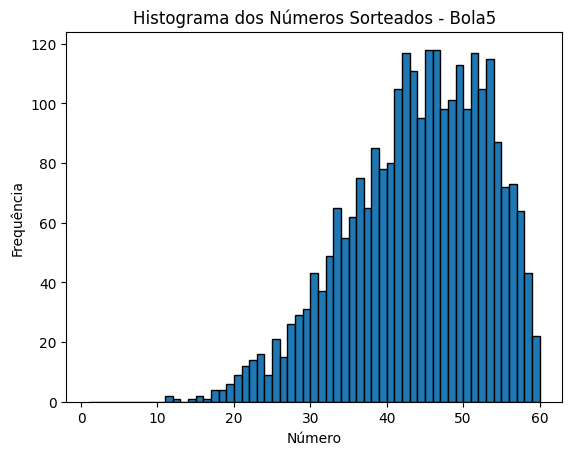

Estatísticas para Bola5:
count    2669.000000
mean       43.565380
std         9.039349
min        11.000000
25%        38.000000
50%        45.000000
75%        51.000000
max        59.000000
Name: Bola5, dtype: float64


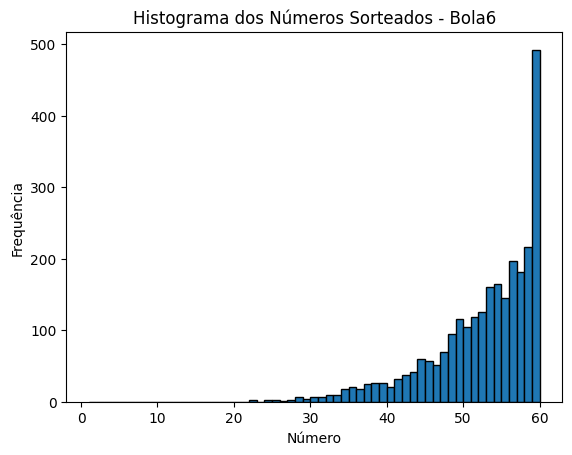

Estatísticas para Bola6:
count    2669.000000
mean       52.172724
std         7.006138
min        22.000000
25%        49.000000
50%        54.000000
75%        58.000000
max        60.000000
Name: Bola6, dtype: float64


In [ ]:
numero_escolhido = ['Bola1', 'Bola2', 'Bola3', 'Bola4', 'Bola5', 'Bola6']

for numero in numero_escolhido:
    serie_temporal = df[numero]

    # Histograma
    plt.hist(serie_temporal, bins=range(1, 61), edgecolor='black')
    plt.title(f'Histograma dos Números Sorteados - {numero}')
    plt.xlabel('Número')
    plt.ylabel('Frequência')
    plt.show()

    # Estatísticas descritivas
    print(f'Estatísticas para {numero}:')
    print(serie_temporal.describe())


In [ ]:
frequencia_impar = numeros.applymap(lambda x: x % 2 != 0).sum().sum()
frequencia_par = numeros.applymap(lambda x: x % 2 == 0).sum().sum()

print(f'Frequência de números ímpares: {frequencia_impar}')
print(f'Frequência de números pares: {frequencia_par}')

Frequência de números ímpares: 7962
Frequência de números pares: 8052


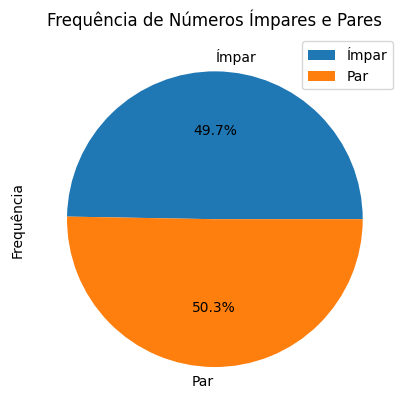

In [ ]:
df = pd.DataFrame({'Frequência': [frequencia_impar, frequencia_par]},
                  index=['Ímpar', 'Par'])

# Crie o gráfico de pizza
df.plot(kind='pie', y='Frequência', title='Frequência de Números Ímpares e Pares', autopct='%1.1f%%')

plt.show()

In [ ]:
numeros.corr()

,Bola1,Bola2,Bola3,Bola4,Bola5,Bola6
Bola1,1.000000,0.639578,0.458004,0.354283,0.247901,0.164145
Bola2,0.639578,1.000000,0.711946,0.532779,0.391331,0.263103
Bola3,0.458004,0.711946,1.000000,0.755584,0.560782,0.367520
Bola4,0.354283,0.532779,0.755584,1.000000,0.735419,0.491914
Bola5,0.247901,0.391331,0.560782,0.735419,1.000000,0.656308
Bola6,0.164145,0.263103,0.367520,0.491914,0.656308,1.000000


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Definir recursos e rótulos
X = numeros[['Bola1', 'Bola2', 'Bola3', 'Bola4', 'Bola5', 'Bola6']]
y = numeros[['Bola1', 'Bola2', 'Bola3', 'Bola4', 'Bola5', 'Bola6']]
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo de Árvore de Decisão
model = DecisionTreeClassifier(random_state=42)

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
predictions = model.predict(X_test)

# Imprimir as previsões
print(f'Previsões: {predictions}')


Previsões: [[ 2 16 23 27 47 53]
 [26 27 31 38 44 45]
 [15 25 28 32 38 45]
 ...
 [18 28 30 39 41 58]
 [ 4  5 16 18 27 51]
 [17 27 34 48 51 55]]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Supondo que 'numero_1', 'numero_2', etc. sejam as colunas que contêm os números sorteados
# Preparar os dados para o modelo
X = numeros.shift(periods=1).dropna()

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test = train_test_split(X, test_size=0.3, random_state=42)

# Criar um modelo para cada número
for i in range(1, 7):
    y = numeros.iloc[1:, i-1]
    y_train, y_test = train_test_split(y, test_size=0.3, random_state=42)

    # Criar e treinar o modelo
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Fazer previsões no conjunto de teste
    predictions = model.predict(X_test)

    # Imprimir as previsões
    print(f'Previsões para o número {i}: {predictions}')


Previsões para o número 1: [ 1  2  1  4  2  3  1  4  3  3  5  3  2  4  2  2  5  2  2  1  2  5  2  1
  3  5  2  1  1  2  1  2  2  2  4  4  1  4  5  2  1  1  2  2  2  2  2  4
  1  2  1  2  1  2  1  5  2  2  1  1  2  2  2  3  3  2  2  1  2  2  4  1
  2  2  2  2  2  1  3  2  5  2  6  5  2  2  1  1  3  3  2  3  1  2  1  1
  3  1  1  2  2  2  3  4  3  1  2  1  2  2  1  1  4  1  5  2  2  1  3  6
  3  1  4  1  2  1  2  2  5  4  2  6  1  2  2  1  2  2  3  1  2  4  1  1
  3  2  1  4  4  1  1  2  1  2  1  2  2  2  3  3  1  2  1  2  1  2  2  1
  5  1  3  4  1  4  2  3  1  1  1  2  4  1  2  3  2  3  1  2  2  1  1  2
  4  2  1  2  2  1  3  1  2  2  1  2  5  2  2  1  4  4  2  4  2  2 11  5
  1  5  2  2  1  2  1  2  2  1  1  2  2  3  6  4  1  1  2  2  1  2  1  2
  4  1  5  2  1  1  5  3  2  2  5  2  1  2  3  5  2  4  4  5  1  1  1  2
  1  1  2  1  2  6  2  2  3  1  4  1  2  2  2  2  1  2  1  3  2  5  3  2
  3  2  2  2  1  2  5  4  4  4  2  1  2  1  2  2  3  2  2  2  3  5  1  2
  4  3  2  2  3  2  4  2

In [ ]:
previsoes_str = '''1 2 1 4 4 3 4 4 4 3 5 4 1 4 2 2 5 4 2 1 2 4 2 1 4 5 4 1 1
1 1 2 2 2 4 4 1 4 5 4 1 1 2 2 2 2 1 4 1 4 1 2 1 2 1 4 2 2 1 1 4 2 2 3 4 4 4 1 4 2 4 1 2 2
 2 4 2 1 4 2 5 2 2 5 2 4 1 1 4 4 2 1 1 2 1 1 3 1 1 4 2 2 3 4 4 2 4 1 2 2 1
 1 4 1 5 2 2 1 4 3 1 1 4 1 4 1 2 2 5 4 4 1 4 1 2 1 2 4 3 1 1 4 1 1 1 2 1 4
 2 1 4 2 1 2 1 1 4 2 1 5 1 2 1 2 1 2 2 1 5 1 3 4 1 4 2 3 1 1 1 4 4 1 2 3 4
 1 1 2 2 1 1 2 4 2 1 4 4 1 3 1 1 2 1 2 5 3 2 1 4 4 2 4 2 2 2 4 1 1 2 2 1 2
 1 2 2 1 1 2 2 1 2 4 1 1 2 2 1 2 1 1 1 1 5 2 4 4 5 3 2 2 5 4 1 4 1 5 2 4 4
 5 4 1 1 1 1 1 4 1 2 3 2 2 3 4 1 1 3 2 4 2 1 2 1 3 2 5 1 2 3 2 1 4 1 2 1 4
 4 4 2 1 4 1 4 1 1 2 2 4 1 1 4 2 4 4 2 2 3 2 4 2 4 3 1 4 1 5 4 4 5 2 1 1 1
 4 2 2 4 1 1 1 2 2 4 1 2 1 4 1 4 1 3 1 3 4 4 4 5 4 2 4 4 2 5 4 1 1 5 2 3 4
 2 1 2 1 1 1 1 1 1 4 2 1 4 1 4 3 4 1 2 1 1 2 1 2 1 2 2 4 5 4 1 1 1 1 1 3 1
 4 1 1 2 3 4 1 2 4 1 4 1 4 2 4 2 4 4 4 4 1 4 1 2 5 3 2 2 2 2 1 1 4 1 4 1 1
 1 1 1 2 5 2 4 1 2 2 4 3 1 1 2 4 3 1 2 4 1 5 2 2 4 4 1 4 2 1 3 2 1 1 3 2 4
 1 1 1 1 2 9 1 1 1 1 1 2 2 1 2 4 4 5 1 1 1 2 2 1 4 2 1 3 4 3 5 4 1 1 2 2 1
 1 2 3 2 4 4 5 4 4 1 4 1 3 1 2 1 11 16 11 16 11 13 12 13 13 17 16 16 16 16 13 13  5 13 12  5 11 23 16 11
 17 16 11 16 11 16 16 13 13 16 16 16 16 17 16 13 13 12 23 16 11 13 13 16
 11 12 12 11 16 23 14 16 16 14 11 13 13 18 23 13 13 23 23 11 11 10 16 11
 23 23 11 12 23 11 13 10 11 23 13 11 13 23 16 16 13 13 13 13 11 23 16 16
 13 12 16 13 23 14 13 16 17 11 11 13 16 14 11 16 16 11 16 21 16 16 17 11
 16 11 16 16 16 16 18 16 16 16 23 13 16 16 23 11 23 12 13 16 18 16  5 12
 11 11 16 16 16 11 12 14 11 23 11 11 13 14 13 16 14 10 18 23 11 16 16 11
  5  5 13 16 11 13 10 13  5 11 16 13 16 11 16 13 23 13 16 11 23 11 12 13
 17 23 11 23 23 16 13 18 16 10 16 13 16 13 13 16 12 16 23 16 11 10 37 11
 16 11 13 13 16 23  5 16 13 12 13 11 13 13 13 16 16  5 16 12 11 13 13 18
 16 13 16 16 11  5 16 13 13 23 16 16 11 23 13 11 13 16 16 16 12 11 16 16
 11 16 11 11 13 13 16 23 13 11 13 16 23 13 11 10 12 14 18 13 16 16 13 16
 13 13 13 11 11 14 16 16 16 11 11  5 23 11 11 16 13 14 11 23 13 16 11 16
 11 17 13 11 13 11 16 14 11 13  7 11 12 12 16 16 11 13 11 11 11 17 11 23
 17  5 16 12 11 13 11  5 14 11 16 16 13 13 13 13 13 16 16 17  5 16 11 16
 16 13  5 11 11  5 16 13 13 12 11 16 16 11 11 13 11  5 16 12 12 11 16 16
 17 17 23 13 16 11 11 13 16 21 12 13 23 16 16 13 16 13 16 12 16 13 11 16
  5 16 16 13 23 16 14 16  7 16 11 16 11 12 13 12  5 16 13 16 16 13 23 16
 13 11 23 11 12 16 11 16 11 16 16 16 13 13 16 13 11 11 12 18 14 16 16 13
 11 13 10 11 17 12 13 16 11  5 13 13 12 16 13 12 23 16 13 23 11 13 13 16
 11 11 12 11 13 11 11 11 11  5 16  7 13 16 16 16 11 11 16 11 11 11 37 23
 12 16 13 16 13 23 13 16 16 16 18 13 14 13 11 39 13 13 11 16 11 23 13  5
 16 11 13 11 23 11 28 28 23 25 32 19 32 28 19 19 27 19 24 30 28 28 34 28 32 32 28 27 20 23
 19 27 28 23 28 20 28 29 34 20 25 32 28 29 27 29 28 28 31 24 34 23 28 24
 28 28 28 34 28 31 23 27 27 24 28 23 29 20 29 28 28 29 29 28 28 31 24 28
 29 29 28 28 31 23 19 28 34 20 18 34 28 34 23 23 29 19 31 23 23 31 28 28
 28 28 28 28 24 20 26 28 29 28 26 28 20 20 28 20 24 23 27 24 20 28 29 23
 23 28 27 28 27 17 28 27 27 28 27 23 28 20 31 34 29 28 29 28 28 32 32 28
 23 34 28 19 27 23 32 20 28 29 28 28 29 20 23 27 23 31 23 31 28 24 27 23
 27 28 29 24 28 28 31 19 34 28 20 28 28 34 28 29 24 28 20 28 24 28 32 28
 29 26 23 26 33 20 29 23 20 26 23 28 27 29 29 23 32 28 29 24 28 31 10 34
 28 34 28 31 28 31 34 24 28 28 23 28 29 18 18 24 28 28 24 28 28 28 23 28
 28 23 27 24 34 32 27 29 31 29 27 28 28 29 23 32 26 28 28 27 34 28 24 23
 28 23 28 28 28 23 28 29 18 28 28 28 29 31 26 29 28 20 23 19 24 27 28 27
 23 31 28 34 23 20 23 27 24 32 31 34 24 23 28 20 23 20 28 29 23 27 28 24
 28 19 28 34 18 31 28 27 34 29 23 26 32 27 25 19 34 29 34 23 28 24 28 26
 19 34 28 28 28 31 26 32 20 32 24 28 29 23 23 23 23 19 27 28 34 28 28 24
 24 28 27 34 28 28 27 23 28 32 28 28 27 28 28 28 34 32 28 28 24 28 24 23
 29 19 29 23 20 28 28 29 30 20 28 31 29 32 27 19 28 28 32 28 23 23 28 19
 28 28 28 23 27 28 24 27 23 24 28 28 28 32 23 32 34 27 29 28 19 23 29 27
 29 28 29 28 28 28 28 19 28 27 23 28 23 28 28 28 34 31 28 23 27 20 24 28
 28 23 31 28 19 32 28 30 34 27 28 28 32 30 28 32 29 28 29 31 28 23 26 20
 28 28 28 28 28 34 34 23 28 28 23 23 28 28 28 28 34 28 27 28 28 23 20 31
 28 24 28 23 28 31 29 27 24 20 23 18 20 23 28 31 23 28 26 30 34 29 28 32
 24 34 29 34 31 23 42 39 33 37 37 38 41 42 38 44 37 43 41 43 37 39 37 39 41 37 39 40 33 33
 43 33 37 30 39 33 30 35 37 35 37 37 37 40 33 37 37 37 46 30 37 37 37 30
 39 37 39 37 37 46 33 34 34 46 42 33 46 33 46 42 37 46 46 37 39 37 30 37
 46 46 39 39 46 37 38 37 37 46 35 37 35 37 33 33 44 38 35 38 33 46 42 42
 38 30 37 44 46 33 38 42 44 39 37 42 35 46 42 30 44 37 40 46 30 37 44 37
 33 37 30 39 40 41 39 33 33 30 37 38 37 30 46 37 46 39 40 30 35 37 37 39
 33 37 39 37 41 38 41 46 37 46 39 39 37 41 38 33 33 39 33 46 37 46 46 37
 37 39 40 30 37 37 35 38 37 42 33 44 37 37 39 44 37 30 30 39 46 39 37 35
 37 37 33 37 37 30 38 33 30 37 33 37 37 40 37 33 37 39 40 30 39 37 33 37
 39 37 35 37 41 39 37 46 37 39 38 37 35 35 35 37 30 39 41 39 37 35 33 39
 30 33 33 37 37 37 33 36 39 46 41 37 39 40 38 37 37 30 37 38 37 37 30 33
 39 33 37 37 37 33 35 46 38 37 42 37 46 39 37 37 39 46 33 38 41 33 35 33
 38 46 42 37 37 35 33 40 37 37 39 37 37 33 39 30 33 46 37 46 38 33 37 41
 39 44 35 37 35 39 37 46 37 38 33 37 41 37 37 43 37 35 37 33 37 44 39 37
 44 37 42 39 37 35 37 37 46 37 30 42 44 33 38 35 37 43 43 44 37 42 39 30
 30 39 37 37 39 39 33 33 42 37 39 37 41 42 37 42 37 37 30 39 41 39 37 33
 44 44 37 38 41 42 37 37 30 46 37 39 46 37 33 36 42 38 37 39 37 38 37 43
 37 39 39 38 40 41 46 40 33 30 39 44 37 37 35 37 37 41 46 30 43 38 46 41
 36 39 46 39 39 42 37 37 39 41 33 37 38 30 41 37 37 39 39 30 41 35 44 42
 39 33 35 37 44 39 37 37 37 37 44 35 41 41 37 37 37 30 42 46 37 33 37 33
 37 39 30 37 30 37 37 37 37 39 30 33 39 37 37 37 37 37 33 39 39 33 30 46
 39 37 37 37 38 46 37 33 37 30 33 35 33 37 42 46 38 37 37 30 37 46 42 37
 41 37 36 37 46 33 45 42 52 46 53 46 42 46 53 51 53 51 42 51 52 49 53 45 42 38 45 53 42 35
 50 53 45 46 45 42 46 49 52 42 46 46 45 51 53 53 45 42 44 42 53 52 49 51
 45 42 45 49 42 49 42 53 53 42 45 49 51 42 53 51 46 51 53 45 45 49 51 45
 53 53 45 55 49 45 51 49 53 49 52 53 49 53 42 42 51 51 45 52 52 44 46 45
 51 46 42 45 53 42 52 46 51 45 45 45 42 42 45 42 51 52 53 53 42 42 51 52
 52 45 51 42 53 42 42 53 53 46 53 35 46 42 44 53 44 55 53 42 49 53 45 42
 52 45 42 53 42 45 53 42 45 53 45 42 53 42 35 51 42 45 49 49 42 53 53 45
 53 45 51 51 45 45 49 51 45 45 42 51 46 45 45 51 53 51 42 45 53 45 42 49
 46 53 42 36 45 42 51 42 51 53 42 45 53 53 53 42 53 55 53 46 45 49 42 53
 45 53 49 49 42 45 45 51 49 45 51 45 49 51 49 46 46 45 42 45 45 51 49 42
 46 45 53 53 45 38 53 52 45 53 53 45 45 53 35 53 52 46 46 53 38 42 42 42
 45 42 45 45 52 52 42 49 51 45 51 45 52 45 53 53 45 49 42 50 42 53 51 53
 51 44 46 45 42 49 52 53 53 53 45 38 53 52 45 42 51 42 42 53 51 42 45 42
 45 51 49 45 51 45 46 42 53 51 35 53 42 53 46 46 53 49 52 42 42 51 45 36
 51 38 45 45 45 49 53 38 49 45 51 45 51 51 51 49 52 46 51 51 53 46 45 46
 46 45 53 45 45 45 53 52 51 53 45 42 53 45 45 46 45 42 42 45 42 45 46 52
 51 51 53 51 42 45 45 52 51 29 45 45 44 53 53 53 45 49 46 45 42 52 45 51
 45 42 42 51 53 42 42 53 35 46 45 46 45 46 49 53 38 53 45 42 51 51 44 53
 51 45 53 45 42 46 45 53 45 53 51 49 45 51 46 45 53 45 45 51 42 42 46 51
 45 49 49 45 51 42 45 53 53 53 51 49 53 46 45 53 53 42 51 44 46 49 52 42
 45 45 46 45 51 36 36 53 45 45 51 49 49 46 46 49 45 45 53 42 45 35 42 49
 45 46 49 42 52 53 52 52 53 51 42 49 42 52 45 44 52 49 53 51 36 36 51 45
 53 45 52 45 44 45 60 60 60 60 60 59 60 59 60 59 60 59 60 59 60 60 56 59 60 60 60 60 60 53
 59 60 60 60 60 60 60 60 60 60 60 60 60 59 60 59 60 60 60 60 60 60 60 59
 60 60 60 60 60 59 60 60 60 59 60 60 59 60 59 59 60 59 59 53 60 60 59 60
 60 59 60 60 59 53 59 60 60 59 53 60 60 60 60 60 59 59 59 53 53 59 60 59
 59 60 60 59 59 60 60 59 59 60 60 60 60 60 60 60 59 60 60 59 59 60 59 53
 60 60 59 60 60 60 60 60 60 59 60 53 60 60 58 60 60 60 60 60 60 60 60 60
 60 60 60 60 60 53 60 60 60 58 53 60 60 60 51 60 60 59 53 59 60 59 60 60
 56 60 59 59 60 60 60 60 60 60 60 59 60 53 60 59 60 59 60 60 59 60 60 59
 59 60 60 60 59 60 59 60 59 60 60 60 60 60 60 60 60 59 60 59 60 60 60 60
 60 53 60 60 60 58 56 59 60 60 60 60 60 59 53 60 59 60 60 60 60 60 60 60
 59 53 60 60 60 60 60 59 58 60 60 60 60 60 51 60 60 59 60 60 60 60 60 60
 60 60 60 60 60 53 60 59 51 60 59 60 59 60 60 60 60 59 60 60 60 60 60 60
 60 58 59 60 60 59 60 60 60 60 60 56 60 53 60 60 60 59 60 59 60 60 60 60
 59 59 53 53 59 59 60 59 60 60 40 60 60 60 60 59 60 60 53 60 60 59 60 60
 59 56 60 60 60 60 60 60 59 60 59 59 59 60 60 53 60 59 59 59 53 60 60 60
 59 60 60 60 60 60 60 53 59 60 59 60 60 59 60 59 60 60 60 60 60 60 60 60
 59 59 59 51 60 60 60 60 59 59 60 59 58 60 60 60 60 60 60 60 60 53 60 60
 56 60 60 60 60 60 60 60 53 59 60 59 60 60 60 60 60 60 59 59 59 60 58 60
 59 60 59 60 60 59 60 60 60 60 60 60 60 59 60 59 60 59 60 60 60 60 59 59
 60 53 60 60 59 60 59 60 60 53 59 59 60 60 60 60 60 60 59 59 60 60 60 60
 60 60 60 60 59 60 53 60 60 60 60 53 60 60 60 60 60 60 60 60 60 53 60 59
 60 60 60 60 60 59 58 60 59 59 60 60 60 60 60 58 53 60 60 59 53 58 59 60
 60 53 60 60 59 53'''

In [ ]:
previsoes_lista_str = previsoes_str.split()

# Converter a lista de strings de números em uma lista de inteiros
previsoes_lista_int = [int(num_str) for num_str in previsoes_lista_str]

# Agora você pode continuar com o cálculo da frequência como antes
previsoes_series = pd.Series(previsoes_lista_int)
frequencia = previsoes_series.value_counts()
print(frequencia)

60    358
1     191
28    178
37    174
16    152
2     145
4     133
53    132
45    123
59    121
11    116
13    116
42    112
23    111
46     89
51     73
39     69
33     60
5      50
29     48
49     45
30     44
27     41
34     37
38     36
3      35
24     34
35     34
12     33
52     32
20     29
44     29
31     27
32     26
41     25
19     20
14     15
18     15
17     14
40     13
26     12
36     10
58     10
10      9
43      8
56      6
55      3
7       3
25      3
21      2
50      2
9       1
Name: count, dtype: int64


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Supondo que 'numero_1', 'numero_2', etc. sejam as colunas que contêm os números sorteados
# Preparar os dados para o modelo
X = numeros.shift(periods=1).dropna()

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test = train_test_split(X, test_size=0.3, random_state=42)

# Criar um modelo para cada número
for i in range(1, 7):
    y = numeros.iloc[1:, i-1]
    y_train, y_test = train_test_split(y, test_size=0.3, random_state=42)

    # Criar e treinar o modelo
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Fazer previsões no conjunto de teste
    predictions = model.predict(X_test)

    # Calcular e imprimir as métricas
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')

    print(f'Previsões para o número {i}: {predictions}')
    print(f'Acurácia: {accuracy}')
    print(f'Precisão: {precision}')
    print(f'Recall: {recall}')
    print(f'F1-Score: {f1}')

    # Matriz de confusão
    cm = confusion_matrix(y_test, predictions)
    print(f'Matriz de Confusão: \n{cm}')


Previsões para o número 1: [ 1  2  1  4  2  3  1  4  3  3  5  3  2  4  2  2  5  2  2  1  2  5  2  1
  3  5  2  1  1  2  1  2  2  2  4  4  1  4  5  2  1  1  2  2  2  2  2  4
  1  2  1  2  1  2  1  5  2  2  1  1  2  2  2  3  3  2  2  1  2  2  4  1
  2  2  2  2  2  1  3  2  5  2  6  5  2  2  1  1  3  3  2  3  1  2  1  1
  3  1  1  2  2  2  3  4  3  1  2  1  2  2  1  1  4  1  5  2  2  1  3  6
  3  1  4  1  2  1  2  2  5  4  2  6  1  2  2  1  2  2  3  1  2  4  1  1
  3  2  1  4  4  1  1  2  1  2  1  2  2  2  3  3  1  2  1  2  1  2  2  1
  5  1  3  4  1  4  2  3  1  1  1  2  4  1  2  3  2  3  1  2  2  1  1  2
  4  2  1  2  2  1  3  1  2  2  1  2  5  2  2  1  4  4  2  4  2  2 11  5
  1  5  2  2  1  2  1  2  2  1  1  2  2  3  6  4  1  1  2  2  1  2  1  2
  4  1  5  2  1  1  5  3  2  2  5  2  1  2  3  5  2  4  4  5  1  1  1  2
  1  1  2  1  2  6  2  2  3  1  4  1  2  2  2  2  1  2  1  3  2  5  3  2
  3  2  2  2  1  2  5  4  4  4  2  1  2  1  2  2  3  2  2  2  3  5  1  2
  4  3  2  2  3  2  4  2